# week7 Twitter Analysis

Author: Hozumi Oshida

Description:
For this assignement, I am using xxxxxxx to create a visualization of xxxxxxxxx.

 ## Import libraries 
 
 Steps:
 1. Import regulars (e.g. pandas, numpy, and matplotlib) 
 2. Import tweepy to use tweets for an analysis
 3. Import TextBlob and re for a sentiment analysis
 4. Import WordClouds and STOPWORDS for a visualization of word frequency in tweets

In [30]:
# Step 1: Import regulars
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox
import matplotlib.pyplot as plt

# Step 2: Import tweepy to use tweets for an analysis
import tweepy as tw

# Step 3: Import TextBlob and re for a sentiment analysis
from textblob import TextBlob
import re

# Step 4: Import WordClouds and STOPWORDS for a visualization of word frequency in tweets
from wordcloud import WordCloud, STOPWORDS

## Import my twitter information
Steps:

1. Import my twitter keys, secrets, and tokens
2. Authenticate myself with twitter

In [31]:
# Step 1: Import my twitter keys, secrets, and tokens
consumer_key= 'OtUpm9g0YHK8rZr9YpBLc20wZ'
consumer_secret= 'Jf496VjiuQPk4xMTMEqup0UTSBXtW0bCdeyE26lEMNLMXbAZEh'
access_token= '1364101434006900736-9j1GmgGhQD6v32CsoQZxqJcRmNViaY'
access_token_secret= '8NXp40KLcLptAlRJiR2nWdsbRa9XDdPE3Q83YiXYCSX26'

In [32]:
# Step 2: Authenticate myself with twitter
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## Visualization of Tweets

Steps:
1. Define sentiment_colors that is used for a bar chart
2. Get the tweets 
3. Create a dataframe with a json format
4. Clean the dataframe
5. Create a wordcloud
6. Create a bar chart  
7. Create a histogram
8. Look up the top 10 and bottom 10 

In [33]:
# Step 1: Define sentiment_colors that is used for a bar chart
sentiment_colors = ox.plot.get_colors(5,cmap='PiYG',return_hex=True)

In [34]:
# Step 2: Get the tweets
##  In this process, I will remove retweets from a result

def find_tweets(q,count=500):
    
    tweets = tw.Cursor(api.search,
                       q=q+' -filter:retweets', 
                       tweet_mode='extended').items(count)


# Step 3: Create the dataframe with a json format
    
    json_data = [tweet._json for tweet in tweets]
    df = pd.json_normalize(json_data)


# Step 4: Clean the dataframe

    df = df[['created_at','full_text']]

    def clean_tweet(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

    df['clean_text'] = ''
    
    for i, row in df.iterrows():
        clean = clean_tweet(row.full_text)
        df.at[i,'clean_text'] = clean


# Step 5: Create a wordcloud

    all_text = ' '.join(df['clean_text'])
    
    stop_words = [searchterm] + list(STOPWORDS)
    
    wordcloud = WordCloud(width=1200, 
                          height=800,
                          background_color="white",
                          stopwords=stop_words).generate(all_text)
                 
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
# Step 6: Create a bar chart for sentiment analysis
    
    df['polarity']=''
    
    for i, row in df.iterrows():
        a = TextBlob(row.full_text)
        df.at[i,'polarity'] = a.polarity
   
    conditions = [
        (df['polarity'] < -0.2), # very negative
        (df['polarity'] < 0) & (df['polarity'] >= -0.2),   # negative
        (df['polarity'] == 0),  # neutral
        (df['polarity'] > 0) & (df['polarity'] <= 0.2),    # positive
        (df['polarity'] > 0.2)  # very positive
        ]

    values = [
        'very negative', 
        'negative', 
        'neutral', 
        'positive',
        'very positive'
        ]

    df['sentiment'] = np.select(conditions, values)

    fig = px.bar(df, 
                 x='sentiment',
                 width=600,
                 title='Sentiment analysis for "'+ q + '"',
                 color='sentiment',
                 category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
                 color_discrete_sequence=sentiment_colors, # use the colors selected in previous cell
                )
    
    fig.update_traces(marker_line_width=0) # gets rid of horizontal white lines
    fig.show()


# Step 7: Create a histogram
    
    num_bins = 50
    plt.figure(figsize=(10,6))
    n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel('Polarity')
    plt.ylabel('Count')
    plt.title('Histogram of polarity for "' + q + '"')

    plt.axvline(df.polarity.mean(), color='k', linestyle='dashed', linewidth=1)

    min_ylim, max_ylim = plt.ylim()
    plt.text(df.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.polarity.mean()))

    plt.show()


# Step 8: Look up the top 10 and bottom 10 
    
    top10 = df.sort_values('polarity').head(10)[['clean_text','polarity']]
    bottom10 = df.sort_values('polarity').tail(10)[['clean_text','polarity']]
    
    display('Top 10 negative tweets')
    display(top10)
    
    display('Top 10 positive tweets')
    display(bottom10)

### Visualization of "President Joko Widodo"

**What I am visualizing:**

a frequency of words related to President Joko Widodo, sentiment analysis for “President Joko Widodo”, histogram of polarity for the key word, and the top 10 positive and negative tweets.


**Why it is interesting:**

Joko Widodo is the president of Indonesia, and the reason why I picked the president as a keyword for Twitter analysis is that various articles emphasize that one of the reasons for an increase in flood and a significant impact of the disaster is government. Specifically, the magnitude of floods and their impact is becoming larger due to the lack of disaster preparation by the government. Moreover, the president announced that he is planning to move the capital of Indonesia from Jakarta to East Borneo in order to avoid floods. However, there are a lot of arguments that moving capital will not be a practical solution for the increase in a flood. Due to these criticisms, I thought it would be interesting to search “President Joko Widodo” and conduct the sentiment analysis. In fact, the bar chart of sentiment analysis for President Joko Widodo shows that “very negative” sentiment has the second-highest count after "neutral” sentiment. However, according to the list of top 10 negative tweets, it seems most of them are the same sentence and might be tweeted by the same person or bot. Therefore, although there are some articles arguing the way in which the president has handled the disaster, it is difficult to say that the second-highest sentiment is actually “very negative” based on what is tweeted in the top 10 negative tweets. 


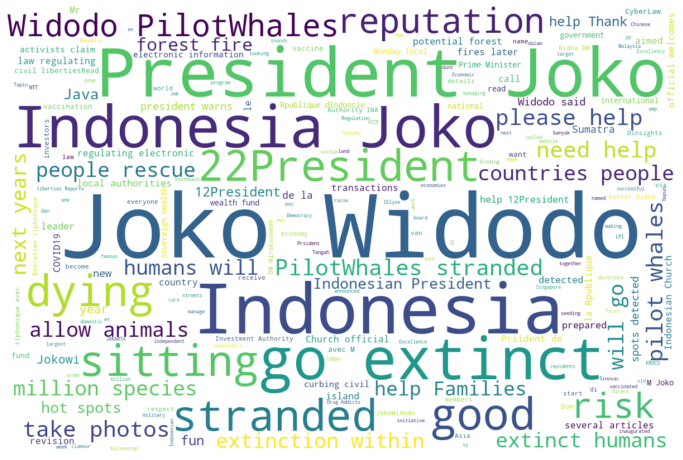

In [39]:
find_tweets(q='President Joko Widodo')

### Visualization of Frequently Used Words

In this section, I am creating wordclouds. Therefore, this process only requires steps from 2 to 5 which I demonstrated above. 

In [40]:
# Step 2: Get the tweets
##  In this process, I will remove retweets from a result

def find_tweets(q,count=500):
    
    tweets = tw.Cursor(api.search,
                       q=q+' -filter:retweets', 
                       tweet_mode='extended').items(count)


# Step 3: Create the dataframe with a json format
    
    json_data = [tweet._json for tweet in tweets]
    df = pd.json_normalize(json_data)


# Step 4: Clean the dataframe

    df = df[['created_at','full_text']]

    def clean_tweet(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

    df['clean_text'] = ''
    
    for i, row in df.iterrows():
        clean = clean_tweet(row.full_text)
        df.at[i,'clean_text'] = clean


# Step 5: Create a wordcloud

    all_text = ' '.join(df['clean_text'])
    
    stop_words = [searchterm] + list(STOPWORDS)
    
    wordcloud = WordCloud(width=1200, 
                          height=800,
                          background_color="white",
                          stopwords=stop_words).generate(all_text)
                 
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


#### Visualization of Trend in Global Disaster

**What I am visualizing:**

a frequency of words related to a global disaster

**Why it is interesting:**

Based on my previous data visualization, I suggested, on a global scale, there was an increase in the climate disasters, such as floods and storms. According to the wordcloud of “global disaster”, it is clear that people mention climate-related words, including global warming, climate disasters, climate change, climate, and weather, in their tweets. Hence, this visualization allows us to see how people are also aware of global rising temperature and its effect on the trend in disaster types. 

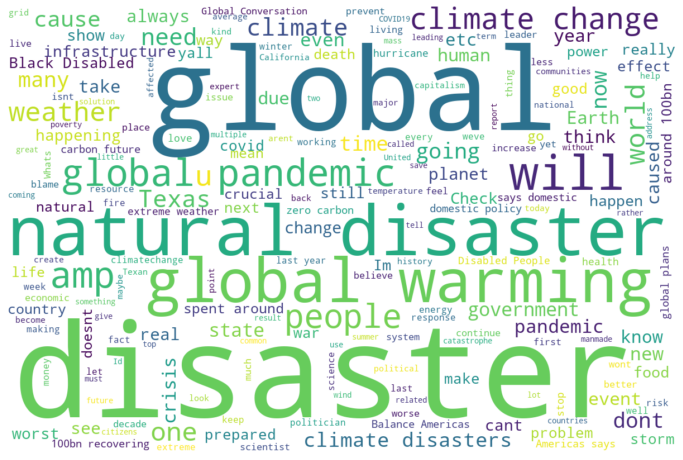

In [41]:
find_tweets(q='global disasters') 

#### Visualization of Trend in Disaster in Indonesia

**What I am visualizing:**

a frequency of words related to the Indonesia disasters

**Why it is interesting:**

In my previous data visualization assignment, I also emphasized that the frequency of floods in Indonesia was significantly increasing. According to the following wordcloud, people tweet floods, rain, landslide, climate change disaster, climate change, storm, weather, and hurricane. All of these are related to not only floods but also climate change. Therefore, this visualization shows words related to floods and climate change are highly used for the keyword “Indonesia disasters.” In addition, while general climate-related terms, like climate disasters, occupy most of the wordcloud of global disaster, the wordcloud of Indonesia disaster has more words that describe disaster type, like flood, flooding, landslide, and storm. This frequent use of the specific disaster types is another way to indicate that Indonesia has a high frequency of these types of climate disasters, specifically floods. 

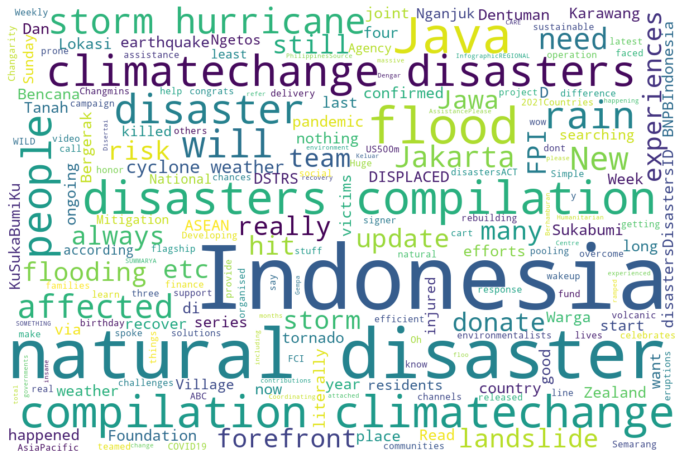

In [42]:
find_tweets(q='indonesia disasters') 

**Who contributes to the assignment?**

All visualizations are created by Hozumi Oshida